# CODSOFT TASK 2 - BY SAKSHI SRIVASTAVA

# IRIS FLOWER CLASSIFICATION
**The Iris flower dataset consists of three species: setosa, versicolor,and virginica. These species can be distinguished based on their measurements. 
Now, imagine that you have the measurements of Iris flowers categorized by their respective species. Your objective is to train a machine learning model that can learn from these measurements and accurately classify the Iris flowers into their respective species.
Use the Iris dataset to develop a model that can classify iris flowers into different species based on their sepal and petalmeasurements.
This dataset is widely used for introductory classification tasks.**
<code>https://www.kaggle.com/datasets/arshid/iris-flower-dataset</code>

**Import Libraries**

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve,accuracy_score
from sklearn.model_selection import cross_val_score
from imblearn.over_sampling import SMOTE
import warnings
warnings.filterwarnings("ignore")

**Load Dataset**

In [6]:
!pip install kagglehub

In [7]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("arshid/iris-flower-dataset")

print("Path to dataset files:", path)

Path to dataset files: C:\Users\hp\.cache\kagglehub\datasets\arshid\iris-flower-dataset\versions\1


In [8]:
import os
directory_path = r"C:\Users\hp\.cache\kagglehub\datasets\arshid\iris-flower-dataset\versions\1"
files = os.listdir(directory_path)

print("Files in dataset directory:")
for f in files:
    print(f)


Files in dataset directory:
IRIS.csv


In [9]:
df = pd.read_csv(r"C:\Users\hp\.cache\kagglehub\datasets\arshid\iris-flower-dataset\versions\1\IRIS.csv")

In [10]:
print(df.head())

   sepal_length  sepal_width  petal_length  petal_width      species
0           5.1          3.5           1.4          0.2  Iris-setosa
1           4.9          3.0           1.4          0.2  Iris-setosa
2           4.7          3.2           1.3          0.2  Iris-setosa
3           4.6          3.1           1.5          0.2  Iris-setosa
4           5.0          3.6           1.4          0.2  Iris-setosa


In [11]:
print(df.tail())

     sepal_length  sepal_width  petal_length  petal_width         species
145           6.7          3.0           5.2          2.3  Iris-virginica
146           6.3          2.5           5.0          1.9  Iris-virginica
147           6.5          3.0           5.2          2.0  Iris-virginica
148           6.2          3.4           5.4          2.3  Iris-virginica
149           5.9          3.0           5.1          1.8  Iris-virginica


In [12]:
print(df.sample())

    sepal_length  sepal_width  petal_length  petal_width          species
73           6.1          2.8           4.7          1.2  Iris-versicolor


In [13]:
df.shape

(150, 5)

In [14]:
df.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')

In [15]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB
None


* The Iris dataset has 150 rows and 5 columns:
* **Numerical features (float64):** sepal_length, sepal_width, petal_length, petal_width:.
* **Categorical target variable (object):** object.
All columns have 150 non-null entries, and the dataset memory usage is  6.0 KB

In [17]:
c=df['species'].value_counts()
c

species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64

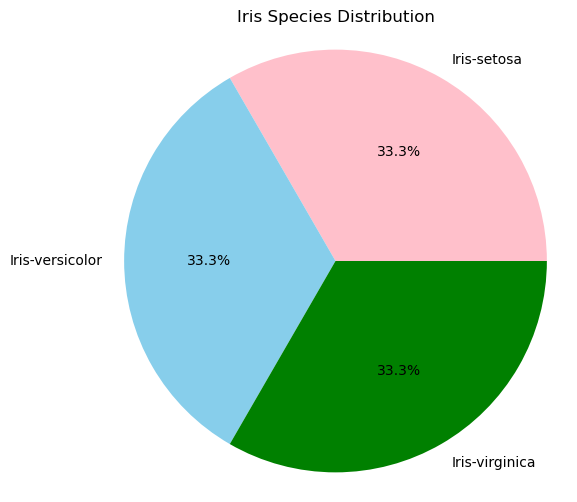

In [18]:
# Pie chart
plt.figure(figsize=(6, 6))
plt.pie(c, labels=c.index, autopct='%1.1f%%', colors=['pink', 'skyblue', 'green'])
plt.title("Iris Species Distribution")
plt.axis('equal')  
plt.show()

Text(0.5, 1.0, 'Species Distribution')

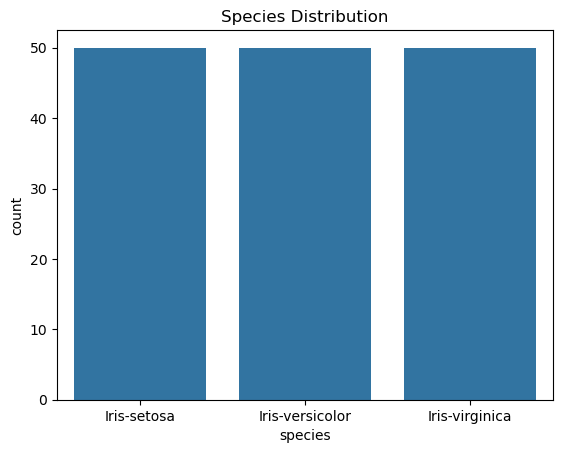

In [19]:

sns.countplot(data=df,x='species')
plt.title('Species Distribution')



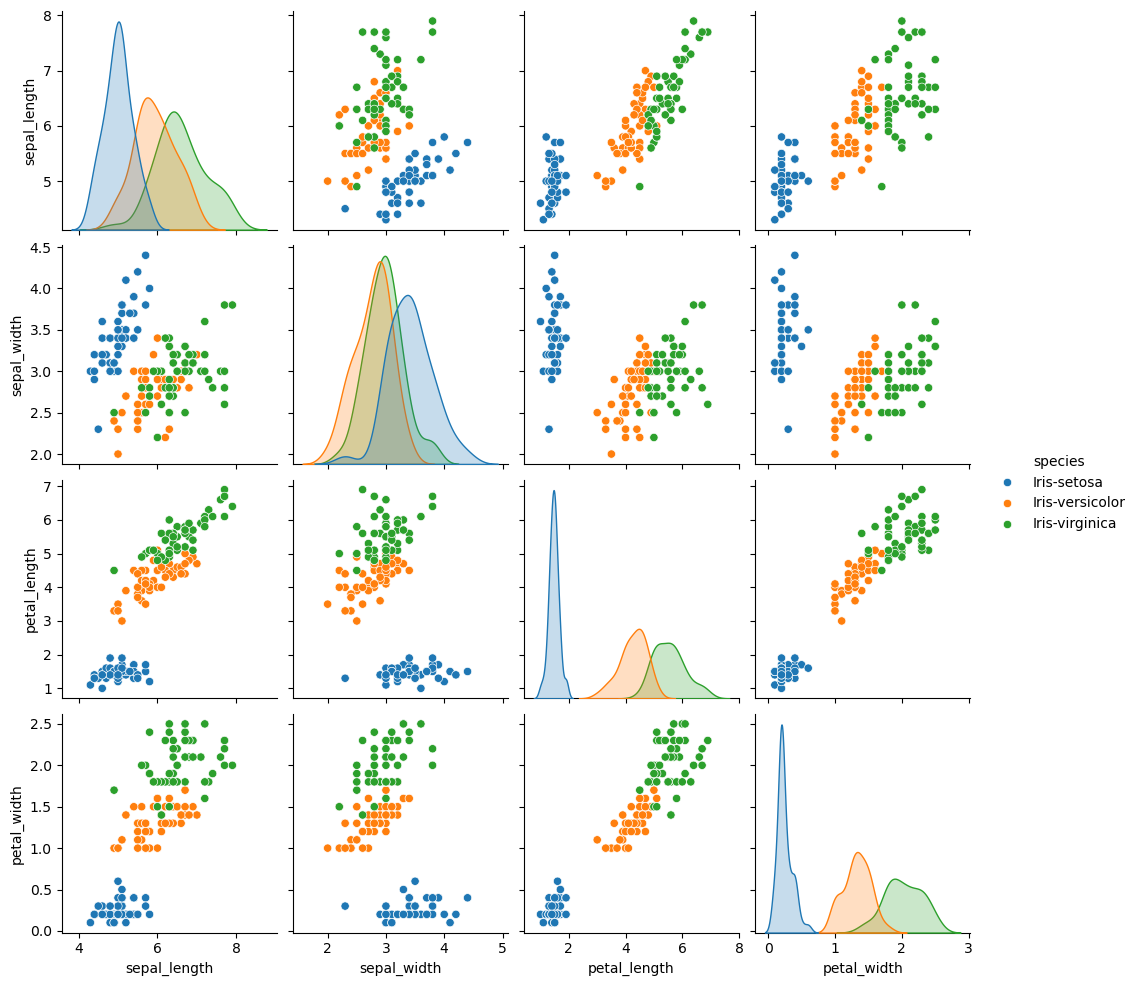

In [20]:
sns.pairplot(df, hue="species")

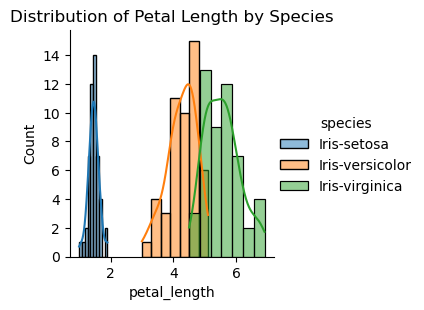

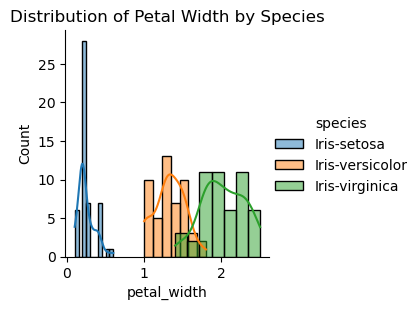

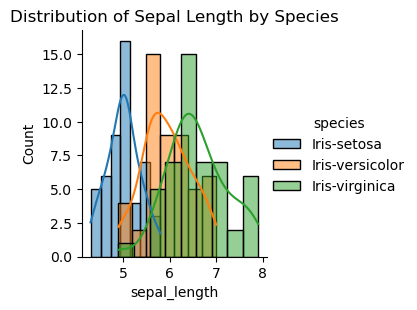

In [21]:
# petal_length
sns.FacetGrid(df, hue="species", height=3).map(sns.histplot, "petal_length", kde=True).add_legend()
plt.title("Distribution of Petal Length by Species")
plt.show()
# petal_width
sns.FacetGrid(df, hue="species", height=3).map(sns.histplot, "petal_width", kde=True).add_legend()
plt.title("Distribution of Petal Width by Species")
plt.show()
# sepal_length
sns.FacetGrid(df, hue="species", height=3).map(sns.histplot, "sepal_length", kde=True).add_legend()
plt.title("Distribution of Sepal Length by Species")
plt.show()


**Encoding**

In [23]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['species'] = le.fit_transform(df['species'])  


**Split data**

In [25]:
X = df.drop('species', axis=1)
y = df['species']


# Standardize the features
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [26]:
print(X_train.shape, X_test.shape)
print(y_train.shape, y_test.shape)

(120, 4) (30, 4)
(120,) (30,)


In [31]:
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [33]:
scores = cross_val_score(model, X, y, cv=5)

# Show results
print("Cross-validation scores for each fold:", scores)
print("Mean cross-validation accuracy:", scores.mean())

Cross-validation scores for each fold: [0.96666667 0.96666667 0.93333333 0.96666667 1.        ]
Mean cross-validation accuracy: 0.9666666666666668


**Evaluate model**

Confusion Matrix:
 [[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]


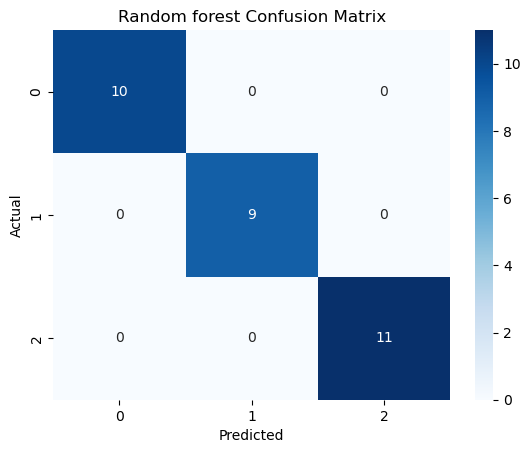


Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



In [36]:
y_pred = model.predict(X_test)

print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.title(f'Random forest Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()
print("\nClassification Report:\n", classification_report(y_test, y_pred))


In [38]:
acc = accuracy_score(y_test,model.predict(X_test)) * 100
print(f"Random Forest model accuracy: {acc:.2f}%")

Random Forest model accuracy: 100.00%


In [40]:
sample = np.array([[5.1, 3.5, 1.4, 0.2]]) 
prediction = model.predict(sample)
print("Predicted class:", le.inverse_transform(prediction))


Predicted class: ['Iris-virginica']


In [42]:
sample1 = np.array([[  6.5 , 3.0,  5.2, 2.0]]) 
prediction = model.predict(sample1)
print("Predicted class:", le.inverse_transform(prediction))


Predicted class: ['Iris-virginica']


Text(0.5, 1.0, 'Feature Importance')

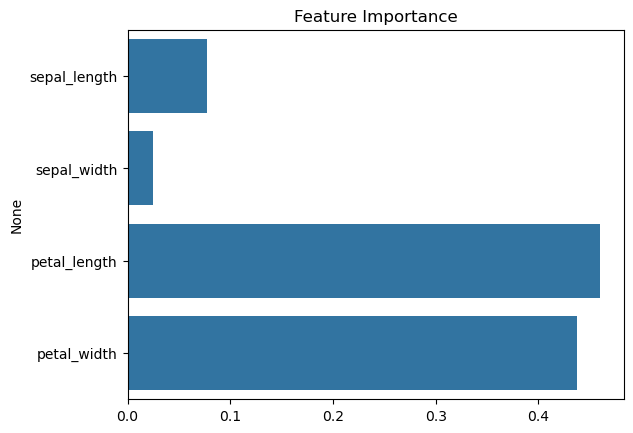

In [44]:
model = RandomForestClassifier()
model.fit(X_train, y_train)
importances = model.feature_importances_
feature_names = X.columns
sns.barplot(x=importances, y=feature_names)
plt.title("Feature Importance")

In [46]:
from sklearn.svm import SVC

svm_model = SVC(kernel='linear', random_state=42)
svm_model.fit(X_train, y_train)



SVC(kernel='linear', random_state=42)

In [48]:
# Predict on the test set
svm_pred = svm_model.predict(X_test)

SVM Accuracy: 0.9666666666666667

SVM Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      0.89      0.94         9
           2       0.92      1.00      0.96        11

    accuracy                           0.97        30
   macro avg       0.97      0.96      0.97        30
weighted avg       0.97      0.97      0.97        30



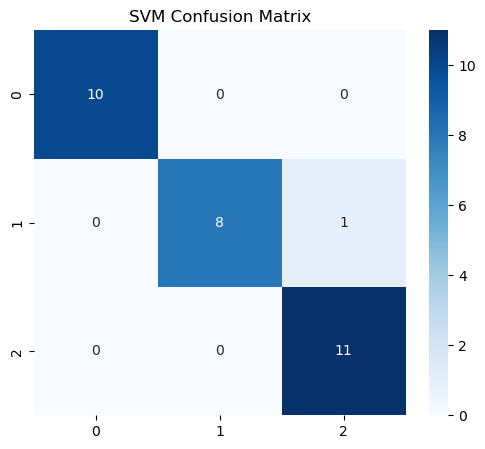

In [50]:
# SVM accuracy
print("SVM Accuracy:", accuracy_score(y_test, svm_pred))

# SVM classification report
print("\nSVM Classification Report:\n", classification_report(y_test, svm_pred))

# SVM confusion matrix
plt.figure(figsize=(6, 5))
sns.heatmap(confusion_matrix(y_test, svm_pred), annot=True, fmt="d", cmap="Blues", xticklabels=df['species'].unique(), yticklabels=df['species'].unique())
plt.title('SVM Confusion Matrix')
plt.show()

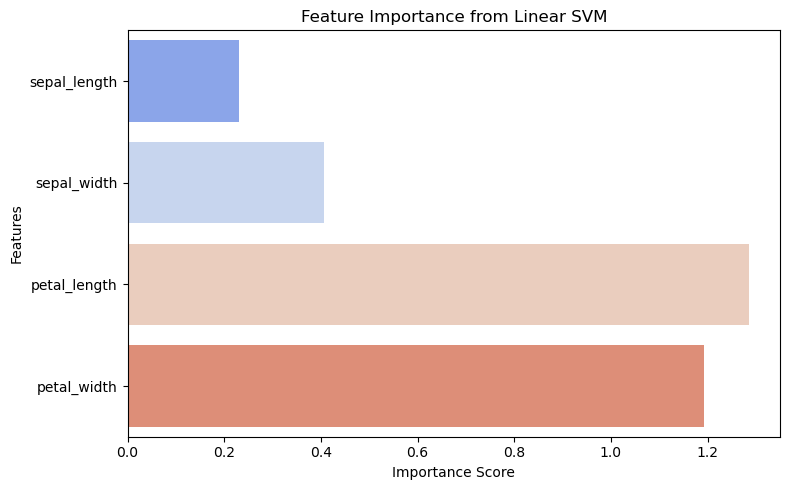

In [52]:

# Train a linear SVM model
svm_model = SVC(kernel='linear', random_state=42)
svm_model.fit(X_train, y_train)

# Get absolute values of coefficients as feature importance
coefficients = np.abs(svm_model.coef_).mean(axis=0)  # Average for multiclass
feature_names = X.columns

# Plot
plt.figure(figsize=(8, 5))
sns.barplot(x=coefficients, y=feature_names, palette="coolwarm")
plt.title("Feature Importance from Linear SVM")
plt.xlabel("Importance Score")
plt.ylabel("Features")
plt.tight_layout()
plt.show()


In [54]:
from sklearn.neighbors import KNeighborsClassifier
model1=KNeighborsClassifier(n_neighbors=3)
model1.fit(X_train,y_train.ravel())

KNeighborsClassifier(n_neighbors=3)

In [56]:
from sklearn.metrics import classification_report
y_pred=model1.predict(X_test)
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



In [58]:
from sklearn.metrics import accuracy_score
accuracy_score(y_pred,y_test)*100

100.0

from sklearn.preprocessing import OrdinalEncoder
y_train_r = y_train.values.reshape(-1, 1)
y_test_r = y_test.values.reshape(-1, 1)
m = OrdinalEncoder()
y_train_encoded_samp=m.fit_transform(y_train_r)
y_test_encoded_samp=m.transform(y_test_r)

In [61]:
from sklearn.linear_model import LogisticRegression
model2=LogisticRegression(max_iter=500,random_state=1)
model2.fit(X_train,y_train.ravel())

LogisticRegression(max_iter=500, random_state=1)

In [65]:
y_pred2=model1.predict(X_test)
print(classification_report(y_pred2,y_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



In [71]:
accuracy_score(y_pred2,y_test)*100

100.0

Random Forest Model:<br>

* Accuracy:<br> The Random Forest model achieved a perfect accuracy of 1.0, indicating that it correctly predicted the class for every data point in the test set.
* Classification Report:<br>
The precision, recall, and f1-score for all three classes (Iris-setosa, Iris-versicolor, and Iris-virginica) are 1.00, meaning that the model made no mistakes in predicting the class labels for any sample.
The model is performing excellently across all metrics, with no misclassifications, and the support for each class is relatively balanced<br><br>
Support Vector Machine (SVM) Model:<br>

* Accuracy: The SVM model performed very well with an accuracy of approximately 0.97 (96.67%), which is slightly lower than the Random Forest model but still quite good.
* Classification Report:<br>
The precision, recall, and f1-scores for Iris-setosa and Iris-versicolor are near perfect,with values of 1.00 and 0.89 for recall of Iris-versicolor.
The Iris-virginica class achieved slightly lower precision at 0.92, but the recall is perfect at 1.00, resulting in a high f1-score of 0.96.
Overall, the SVM model performs excellently, though it shows some minor room for improvement in handling the Iris-versicolor and Iris-virginica classes.

**KNN AND LOGISTIC REGRESSION:**
Accuracy is 100%


**So Why the 100% Accuracy?**<br>
* Because the Iris dataset is extremely simple and:
* using powerful models like Random Forest, KNN (k=3), and SVM.
* The classes are linearly separable, especially setosa vs others.
* The dataset is small (150 rows), making it easy to memorize or separate.